<img src='../img/acam_banner.png' alt='ACAM Training School' align='right' width='60%'></img>

<br>

<hr>

# Copernicus Sentinel-5P TROPOMI - Nitrogen Dioxide - Level 2

### About

The Copernicus Sentinel-5 Precursor mission is the first Copernicus mission dedicated to atmospheric monitoring. The main objective of the Sentinel-5P mission is to perform atmospheric measurements with high spatio-temporal resolution, to be used for air quality, ozone & UV radiation, and climate monitoring and forecasting.

Sentinel-5P carries the `TROPOMI` instrument, which is a spectrometer in the UV-VIS-NIR-SWIR spectral range. `TROPOMI` provides measurements on aerosols, ozone and other reactive gases, such as:
* `Ozone`
* `Nitrogen Dioxide (NO`<sub>`2`</sub>)
* `Sulfur Dioxide (SO`<sub>`2`</sub>)
* `Formaldehyde`
* `Aerosol`
* `Carbonmonoxide`
* `Methane`
* `Clouds`

The subsequent example introduces you to Sentinel-5P data in general and the total column of nitrogen dioxide sensed by Sentinel-5P TROPOMI. Nitrogen dioxide is a trace gas to monitor and track air pollution. This notebook shows elevated levels of nitrogen dioxide on 6 April 2023 in northeast Laos and around Shanghai, China.


### Basic Facts

> **Spatial resolution**: `Up to 5.5* km x 3.5 km` (5.5 km in the satellite flight direction and 3.5 km in the perpendicular direction at nadir) <br>
> **Spatial coverage**: `Global` <br>
> **Revisit time**:  `less than one day` <br>
> **Data availability**: `since April 2018`


### How to access the data

Sentinel-5P TROPOMI data are disseminated in the `netCDF` format and can be downloaded via the [Sentinel-5P Pre-Operations Data Hub](https://s5phub.copernicus.eu/dhus/#/home). You can login with the following credentials:
* **Username**: `s5pguest`
* **Password**: `s5pguest`

### Module outline
* [1 - Load and browse Sentinel-5P TROPOMI Nitrogen Dioxide Level 2 data](#load_s5p)
* [2 - Create a geographical subset](#geographical_subset)
* [3 - Visualize Sentinel-5P TROPOMI Nitrogen Dioxide Level 2 data](#visualize_s5p)

<hr>

#### Load required libraries

In [1]:
import os
import xarray as xr
import numpy as np
import netCDF4 as nc

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id="load_s5p"></a>Load and browse Sentinel-5P TROPOMI Nitrogen Dioxide Level 2 data

A Sentinel-5P TROPOMI Nitrogen Dioxide Level 2 file is organised in two groups: `PRODUCT` and `METADATA`. The `PRODUCT` group stores the main data fields of the product, including `latitude`, `longitude` and the variable itself. The `METADATA` group provides additional metadata items.

Sentinel-5P TROPOMI variables have, among others, the following dimensions:
* `scanline`: the number of measurements in the granule / along-track dimension index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `time`: time reference for the data
* `corner`: pixel corner index
* `layer`: this dimension indicates the vertical grid of profile variables

Sentinel-5P TROPOMI data is disseminated in `netCDF`. You can load multiple `netCDF` files at once with the `open_mfdataset()` function of the xarray library. In order to load the variable as part of a Sentinel-5P data files, you have to specify the following keyword arguments: 
- `group='PRODUCT'`: to load the `PRODUCT` group
- `concat_dim='scanline'`: multiple files will be concatenated based on the scanline dimension
- `combine=nested`: combine n-dimensional grids into one along each dimension of the grid

Let us load two Sentinel-5P TROPOMI data file as `xarray.Dataset` from 6 April 2023 and inspect the data structure:

In [3]:
s5p = xr.open_mfdataset('../../eodata/acam_training_school/S5P/S5P_OFFL_L2__NO2*', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p

<xarray.Dataset>
Dimensions:                                               (scanline: 8345, ground_pixel: 450, time: 1, corner: 4, polynomial_exponents: 6, intensity_offset_polynomial_exponents: 1, layer: 34, vertices: 2)
Coordinates:
  * scanline                                              (scanline) float64 ...
  * ground_pixel                                          (ground_pixel) float64 ...
  * time                                                  (time) datetime64[ns] ...
  * corner                                                (corner) float64 0....
  * polynomial_exponents                                  (polynomial_exponents) float64 ...
  * intensity_offset_polynomial_exponents                 (intensity_offset_polynomial_exponents) float64 ...
  * layer                                                 (layer) float64 0.0...
  * vertices                                              (vertices) float64 ...
    latitude                                              (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    longitude                                             (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
Data variables:
    delta_time                                            (time, scanline) datetime64[ns] dask.array<chunksize=(1, 4172), meta=np.ndarray>
    time_utc                                              (time, scanline) object dask.array<chunksize=(1, 4172), meta=np.ndarray>
    qa_value                                              (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    nitrogendioxide_tropospheric_column                   (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    nitrogendioxide_tropospheric_column_precision         (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    nitrogendioxide_tropospheric_column_precision_kernel  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    averaging_kernel                                      (time, scanline, ground_pixel, layer) float32 dask.array<chunksize=(1, 4172, 450, 34), meta=np.ndarray>
    air_mass_factor_troposphere                           (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    air_mass_factor_total                                 (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    tm5_tropopause_layer_index                            (time, scanline, ground_pixel) float64 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    tm5_constant_a                                        (scanline, layer, vertices) float32 dask.array<chunksize=(4172, 34, 2), meta=np.ndarray>
    tm5_constant_b                                        (scanline, layer, vertices) float32 dask.array<chunksize=(4172, 34, 2), meta=np.ndarray>

You see that the loaded data object contains multiple dimensions and data variables, among others:
* **Dimensions**:
  * `scanline` 
  * `ground_pixel`
  * `time`
  * `corner`
  * `layer`


* **Data variables**:
  * `delta_time`: the offset of individual measurements within the granule, given in milliseconds
  * `time_utc`: valid time stamp of the data
  * `qa_value`: quality descriptor, varying between 0 (nodata) and 1 (full quality data).
  * `nitrogendioxide_tropospheric_column`: Vertically integrated NO<sub>2</sub> column density
  * `nitrogendioxide_tropospheric_column_precision`: Standard error of the vertically integrated NO<sub>2</sub> column

You can specify one variable of interest by putting the name of the variable into square brackets `[]` and get more detailed information about the variable. E.g. `nitrogendioxide_tropospheric_column` is the atmosphere mole content of nitrogen dioxide, has the unit `mol per m-2`, and has three dimensions, `time`, `scanline` and `groundpixel` respectively.

In [4]:
s5p_no2 = s5p['nitrogendioxide_tropospheric_column']
s5p_no2

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (time: 1, scanline: 8345, ground_pixel: 450)>
dask.array<concatenate, shape=(1, 8345, 450), dtype=float32, chunksize=(1, 4173, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2023-04-06
    latitude      (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    longitude     (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

You can do this for the available variables, but also for the dimensions latitude and longitude.

In [5]:
print('Latitude')
print(s5p_no2.latitude)

print('Longitude')
print(s5p_no2.longitude)

Latitude
<xarray.DataArray 'latitude' (time: 1, scanline: 8345, ground_pixel: 450)>
dask.array<concatenate, shape=(1, 8345, 450), dtype=float32, chunksize=(1, 4173, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2023-04-06
    latitude      (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
    longitude     (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4172, 450), meta=np.ndarray>
Attributes:
    long_name:      pixel center latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds
Longitude
<xarray.DataArray 'longitude' (time: 1, scanline: 8345, ground_pixel: 450)>
dask.array<concatenate, shape=(1, 8345, 4

<br>

You can retrieve the array values of the variable with squared brackets: `[:,:,:]`. One single time step can be selected by specifying one value of the time dimension, e.g. `[0,:,:]`.

In [6]:
s5p_no2_0604 = s5p_no2[0,:,:]
s5p_no2_0604

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 8345, ground_pixel: 450)>
dask.array<getitem, shape=(8345, 450), dtype=float32, chunksize=(4173, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.171e+03 4.172e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2023-04-06
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(4172, 450), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(4172, 450), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

The attributes of the `xarray.DataArray` hold the entry `multiplication_factor_to_convert_to_molecules_percm2`, which is a conversion factor that can be applied to convert the data from `mol per m`<sup>`2`</sup> to `molecules per cm`<sup>`2`</sup>.


In [8]:
conversion_factor = s5p_no2_0604.multiplication_factor_to_convert_to_molecules_percm2
conversion_factor

6.02214e+19

Additionally, you can save the attribute `longname`, which you can make use of when visualizing the data.

In [9]:
longname = s5p_no2.long_name
longname

'Tropospheric vertical column of nitrogen dioxide'

## <a id='geographical_subset'></a>Create  a geographical subset around East and Southeast Asia

You can zoom into a region by specifying a `bounding box` of interest. Let us set the extent to parts of East and Southeast Asia with the following bounding box information:

In [11]:
latmin = 0.
latmax = 60.
lonmin = 60.
lonmax = 150.

You can use the function [generate_geographical_subset](../functions.ipynb#generate_geographical_subset) to subset an `xarray.DataArray` based on a given bounding box.

In [12]:
s5p_no2_subset = generate_geographical_subset(xarray=s5p_no2_0604, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
s5p_no2_subset

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 2856, ground_pixel: 450)>
dask.array<where, shape=(2856, 450), dtype=float32, chunksize=(1436, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 1.849e+03 1.85e+03 ... 3.267e+03 3.268e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2023-04-06
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(1436, 450), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(1436, 450), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

<br>

## <a id="plotting_s5p"></a>Plotting example - Sentinel-5P TROPOMI Nitrogen Dioxide Level 2 data

You can plot data arrays of type `numpy` with matplotlib's `pcolormesh` function. In combination with the library [cartopy](https://scitools.org.uk/cartopy/docs/latest/), you can produce high-quality maps. 

In order to make it easier to visualize the Nitrogen Dioxide values, we apply the conversion factor to the `xarray.DataArray`. This converts the Nitrogen Dioxide values from *mol per m<sup>2</sup>* to *molecules per cm<sup>2</sup>*.

In [13]:
s5p_no2_converted = s5p_no2_subset*conversion_factor
s5p_no2_converted

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 2856, ground_pixel: 450)>
dask.array<mul, shape=(2856, 450), dtype=float32, chunksize=(1436, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 1.849e+03 1.85e+03 ... 3.267e+03 3.268e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2023-04-06
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(1436, 450), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(1436, 450), meta=np.ndarray>

For visualization, you can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) to visualize the data. The following keyword arguments have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color palette`
* `unit`
* `long_name`
* `vmin`, 
* `vmax`
* `extent (lonmin, lonmax, latmin, latmax)`
* `set_global`

Now, let us apply the [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) function and visualize the vertically integrated nitrogen dioxide column recorded by the Sentinel-5P satellite on 6 April 2023.

Note: Multiplying the vmin and vmax values with 1e<sup>+15</sup> improves the readibility of the map legend. As vmin is already 0, there is no need to multiply it.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Tropospheric vertical column of nitrogen dioxide 2023-04-06'}>)

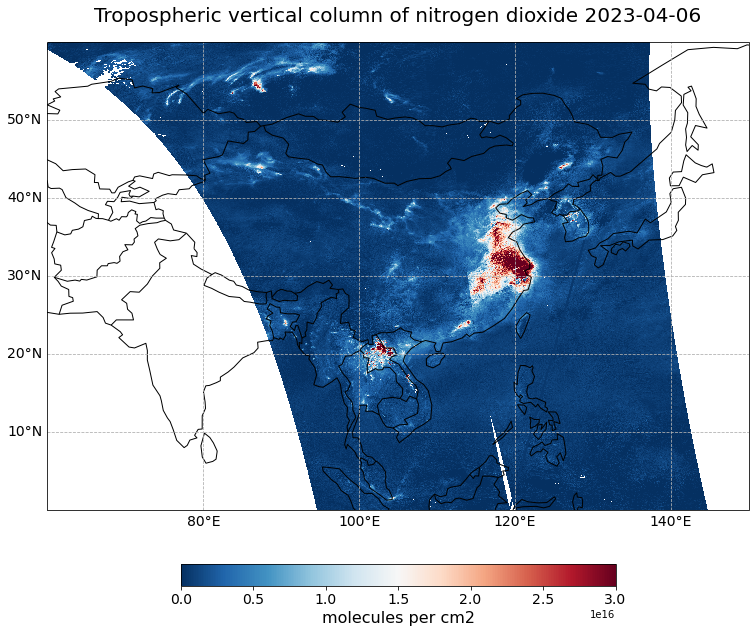

In [14]:
visualize_pcolormesh(data_array=s5p_no2_converted, 
                     longitude=s5p_no2_converted.longitude, 
                     latitude=s5p_no2_converted.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='RdBu_r', 
                     unit='molecules per cm2', 
                     long_name=longname + ' ' + str(s5p_no2_converted.time.data)[0:10], 
                     vmin=0, 
                     vmax=3*10e+15, 
                     lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax, 
                     set_global=False)


Elevated levels of NO<sub>2</sub> can be seen over East Laos and East China, around the city of Shanghai.

<hr>

### References
* Copernicus Sentinel-5P (processed by ESA), 2021, TROPOMI Level 2 Nitrogen Dioxide total column products. Version 02. European Space Agency. https://doi.org/10.5270/S5P-9bnp8q8

<hr>

<img src='../img/acam_banner.png' alt='Logo EU Copernicus' align='left' width='30%'><br><br><br><br><br>
This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>